<span style="color:green">

># Dirac equation and Lagrangian in split octonions
>In this notebook it is demonstrated that Dirac equation and its Lagrangian, which are usually written using Clifford algebra, can be written using non-associative algbera of split octonions.

</span>

In [1]:
import sympy as syp
from IPython.display import Math as displayMath
from SplitOct import *
syp.init_printing(use_unicode=True)
# import numpy as np

import sys
print('python     :', sys.version)
print('sympy      :', syp.__version__)
print('SplitOct   :', version())
# print('numpy      :', np.__version__)
print()
!jupyter --version

python     : 3.11.3 (main, Jun  5 2023, 09:32:32) [GCC 13.1.1 20230429]
sympy      : 1.12
SplitOct   : 0.15

Selected Jupyter core packages...
IPython          : 8.14.0
ipykernel        : 6.25.0
ipywidgets       : 8.1.0
jupyter_client   : 8.3.0
jupyter_core     : 5.3.1
jupyter_server   : 2.7.0
jupyterlab       : 4.0.4
nbclient         : 0.8.0
nbconvert        : 7.7.3
nbformat         : 5.9.2
notebook         : 7.0.2
qtconsole        : not installed
traitlets        : 5.9.0


In [2]:
# useful functions and shortcuts
dispmath = lambda x: display(displayMath(x))
def tex(inputobj):
    if type(inputobj) == SplitOctonion:
        return inputobj.__repr__()
    else:
        return syp.latex(inputobj)
i = syp.I
def sypHermConj(x):
    return syp.transpose(syp.conjugate(x))
half = syp.Rational(1, 2)

In [3]:
def check_clifford_algebra(g_metric, Γ):
    N = len(Γ)
    matrix_dim = Γ[0].shape[0]
    identity_matrix = syp.eye(matrix_dim)
    correct = True
    for m in range(N):
        for n in range(N):
            LHS = Γ[m]@Γ[n] + Γ[n]@Γ[m]
            RHS = 2 * g_metric[m,n] * identity_matrix
            if LHS != RHS:
                correct = False
                print(f'Problem in (m,n)=({m},{n}).')
    if correct: print('Clifford algebra relatoins are satisfied for the provided metric.')

<span style="color:green">

>## Regular Dirac equation
>In standard Clifford algebraic matrix formulation of Dirac theory the Dirac equation is

\begin{equation} i\gamma^{\mu}D_{\mu}\psi=m\psi \end{equation}

>where

\begin{equation} D_{\mu}=\partial_{\mu}+ieA_{\mu} \end{equation}

>and

\begin{equation} \gamma^{\mu}=\left(\begin{pmatrix}1 & 0\\
0 & -1
\end{pmatrix},\quad\begin{pmatrix}0 & \boldsymbol{\sigma}\\
-\boldsymbol{\sigma} & 0
\end{pmatrix}\right) \end{equation}

\begin{equation} \sigma_{1}=\begin{pmatrix}0 & 1\\
1 & 0
\end{pmatrix},\qquad\sigma_{2}=\begin{pmatrix}0 & -i\\
i & 0
\end{pmatrix},\qquad\sigma_{3}=\begin{pmatrix}1 & 0\\
0 & -1
\end{pmatrix} \end{equation}

</span>

In [4]:
m_mass = syp.symbols('m', real=True) # d / d lambda
dee = 4*[None]
A = 4*[None]
ψ = 8*[None]
γ = 4*[None]

for n in range(4):
    ψ[n] = syp.symbols(f'psi_{n}', commutative=False)
    ψ[4+n] = syp.symbols(f'psi_{4+n}', commutative=False)
    if n == 0:
        A[n] = syp.symbols(f'phi', real=True)
        dee[n] = syp.symbols(f'\partial_t', commutative=False)
    else:
        A[n] = syp.symbols(f'A_{n}', real=True)
        dee[n] = syp.symbols(f'\partial_{n}', commutative=False)

γ[0] = syp.Matrix([
    [ 1,  0,  0,  0],
    [ 0,  1,  0,  0],
    [ 0,  0, -1,  0],
    [ 0,  0,  0, -1]])

γ[1] = syp.Matrix([
    [ 0,  0,  0,  1],
    [ 0,  0,  1,  0],
    [ 0, -1,  0,  0],
    [-1,  0,  0,  0]])

γ[2] = syp.Matrix([
    [ 0,  0,  0, -i],
    [ 0,  0,  i,  0],
    [ 0,  i,  0,  0],
    [-i,  0,  0,  0]])

γ[3] = syp.Matrix([
    [ 0,  0,  1,  0],
    [ 0,  0,  0, -1],
    [-1,  0,  0,  0],
    [ 0,  1,  0,  0]])


dispmath(r'\text{Dirac gamma matrices:}')
for n in range(4):
    dispmath(rf'\gamma^{n} = ' + tex(γ[n]))

g_minkowski_metric = syp.diag(1, -1, -1, -1)
dispmath(r'\text{Minkowski metrix:}')
dispmath(r'g_{\mu\nu}=' + tex(g_minkowski_metric))
    
dispmath(r'\text{Checking if given } \gamma \text{ matrices satisfy Clifford algebra relations of given metric....}')
check_clifford_algebra(g_minkowski_metric, γ)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Clifford algebra relatoins are satisfied for the provided metric.


In [5]:
ψ_mat_dirac = syp.Matrix([
    [ ψ[4] + i*ψ[7]],
    [-ψ[6] + i*ψ[5]],
    [ ψ[3] + i*ψ[0]],
    [ ψ[1] + i*ψ[2]]])

dispmath(r'\text{We choose the following labeling of Dirac spinor components in order that it matches}')
dispmath(r'\text{up with split octonionic version with our choice of split octonionic basis unit odering.}''')
dispmath(r'\psi=' + tex(ψ_mat_dirac))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
#dee_slash = dee[0]*γ[0] + dee[1]*γ[1] + dee[2]*γ[2] + dee[3]*γ[3]
#A_slash = γ[0]*A[0] - γ[1]*A[1] - γ[2]*A[2] - γ[3]*A[3]
#Dirac_op = i*(dee_slash + i*A_slash) - m_mass*syp.eye(4)

D = 4*[None]
D[0] = dee[0] + i*A[0]
D[1] = dee[1] - i*A[1]
D[2] = dee[2] - i*A[2]
D[3] = dee[3] - i*A[3]
Dirac_op = i*(γ[0]*D[0] + γ[1]*D[1] + γ[2]*D[2] + γ[3]*D[3]) - m_mass*syp.eye(4)

Dirac_eq_complex = Dirac_op @ ψ_mat_dirac

# Dirac_eq = syp.Matrix(
    # list(syp.re(Dirac_op @ ψ_mat_dirac)) + \
    # list(syp.im(Dirac_op @ ψ_mat_dirac))
# )

Dirac_eq_re = (Dirac_eq_complex + syp.conjugate(Dirac_eq_complex))/2
for n in range(4):
    Dirac_eq_re = Dirac_eq_re.subs(syp.conjugate(dee[n]), dee[n])
    Dirac_eq_re = Dirac_eq_re.subs(syp.conjugate(ψ[n]), ψ[n])
    Dirac_eq_re = Dirac_eq_re.subs(syp.conjugate(ψ[4+n]), ψ[4+n])

Dirac_eq_im = (Dirac_eq_complex - syp.conjugate(Dirac_eq_complex))/(2*i)
for n in range(4):
    Dirac_eq_im = Dirac_eq_im.subs(syp.conjugate(dee[n]), dee[n])
    Dirac_eq_im = Dirac_eq_im.subs(syp.conjugate(ψ[n]), ψ[n])
    Dirac_eq_im = Dirac_eq_im.subs(syp.conjugate(ψ[4+n]), ψ[4+n])
Dirac_eq_re = syp.expand(Dirac_eq_re)
Dirac_eq_im = syp.expand(Dirac_eq_im)
# display(syp.expand(Dirac_eq_re))

Dirac_eq = syp.Matrix(
    list(Dirac_eq_re) + \
    list(Dirac_eq_im)
)
# display(Dirac_eq)
dispmath(r'\text{Dirac equation component wise is:}')
text = r'\begin{aligned}'
for entry in Dirac_eq:
    text += tex(entry) + r' & = 0 \\'
text += r'\end{aligned}'
dispmath(text)
#dispmath(r'0=' + tex(entry))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<span style="color:green">

>## Split octonionic Dirac equation

>Split octonionic dirac equation for the case when $A = 0$ is simply

\begin{equation}  \left(\mathscr{D}-J_{3}m\right)\psi=0 \end{equation} 

>where

\begin{equation} \mathscr{D}=I\partial_{0}-\sum_{n=1}^{3}j_{n}\partial_{n}, \end{equation}

\begin{equation} \psi=\psi_{0}+I\psi_{4}+\sum_{n=1}^{3}\left(j_{n}\psi_{n}+J_{n}\psi_{4+n}\right). \end{equation}

>With external four-potential

\begin{equation} A=I\phi+\sum_{n=1}^{3}j_{n}A_{n} \end{equation}

>equation is

\begin{equation} \left(\mathscr{D}-J_{3}m\right)\psi=J_{3}\left(\mathrm{conj}_{Ij}\left(A\psi\right)I\right). \end{equation}

>Code below checks if this equation is indeed same as regular Dirac equation written with matrices.

</span>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(Sign is overall sign difference of the equation)


<IPython.core.display.Math object>

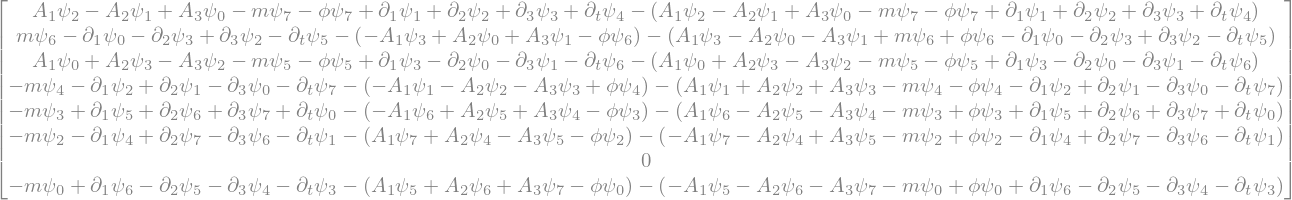

(Should be zeros if equations match up)


In [7]:
ψ_oct_dirac = SplitOctonion(ψ)


scrD_oct = oI*dee[0] - j1*dee[1] - j2*dee[2] - j3*dee[3]

A_oct = SplitOctonion([0, A[1], A[2], A[3], A[0], 0, 0, 0])

# ----------- old code, should probably be deleted ------------
#Dir = scrD_oct + J3*m_mass
#Eq = (A*Psi).conj_j() - J3*(I*(Dir*Psi))
#Eq = (J3*(J2*(J1*(A*Psi)*J1)*J2)*J3)*I + J3*(Dir*Psi)
#Eq = I*(A*Psi).conj_j() + J3*(Dir*Psi)
#Eq = scrD_oct*ψ_oct_dirac + J3*m_mass*ψ_oct_dirac - J3*(oI*(A_oct*ψ_oct_dirac).conj_J().conj_I())
#Eq = scrD_oct*ψ_oct_dirac + J3*m_mass*ψ_oct_dirac - J3*((J3*(J2*(J1*(A_oct*ψ_oct_dirac)*J1)*J2)*J3)*oI)
#Eq = J3*(scrD_oct*ψ_oct_dirac) - m_mass*ψ_oct_dirac - (A_oct*ψ_oct_dirac).conj_I().conj_j()*oI
#Eq = J3*(scrD_oct*ψ_oct_dirac) - m_mass*ψ_oct_dirac
# -------------------------------------------------------------

Eq = (scrD_oct - J3*m_mass)*ψ_oct_dirac - J3*((A_oct*ψ_oct_dirac).conj_I().conj_j()*oI)

OctEq = syp.Matrix(Eq.x)

dispmath(r'\text{Split octonionic equation component wise is:}')
for entry in Eq:
    dispmath(r'0=' + tex(entry))

def _compare_equation_systems():
    R = []
    N = []
    for m in range(8):
        for n in range(8):
            if abs(syp.diff(OctEq[m], dee[1])) == abs(syp.diff(Dirac_eq[n], dee[1])):

                if syp.diff(OctEq[m], dee[1]) == syp.diff(Dirac_eq[n], dee[1]):
                    R.append(OctEq[m] - Dirac_eq[n])
                    N.append(n)
                else:
                    R.append(OctEq[m] + Dirac_eq[n])
                    N.append(-n)
                break
    R = syp.Matrix(R)
    
    dispmath(r'\text{Equation ordering based on the matching of } \partial_1 \text{ term between split octonionic and matrix versions: }')
    display(N)
    print('(Sign is overall sign difference of the equation)')
    dispmath(r'\text{Difference between split octonionic and matrix version of Dirac equation:}')
    display(R)
    print('(Should be zeros if equations match up)')

_compare_equation_systems() # should be zeros if they are the same same

<span style="color:green">

>## Dirac Lagrangian

>In matrix algebra the free Dirac Lagrangian is

\begin{equation} \mathcal{L}_{\text{matrix}}=\overline{\psi}\left(i\gamma^{\mu}\partial_{\mu}-m\right)\psi . \end{equation}

>With split octonions

\begin{equation} \begin{aligned}\mathcal{L}_{\mathbb{O}^{\prime}} & =\frac{1}{2}\left\langle J_{3}\psi,\left(\mathscr{D}-mJ_{3}\right)\psi\right\rangle \\
 & =\frac{1}{2}\left\langle J_{3}\psi,\mathscr{D}\psi\right\rangle +\frac{1}{2}m\left\langle \psi,\psi\right\rangle 
\end{aligned} \end{equation}

>where $ \left\langle \cdot,\cdot\right\rangle :\mathbb{O}^{\prime}\times\mathbb{O}^{\prime}\rightarrow\mathbb{R} $ is a symmetric nondegenerate bilinear form:

\begin{equation} \begin{aligned}\left\langle x,y\right\rangle  & =\frac{1}{2}\left(\overline{x}y+\overline{y}x\right)\\
 & =\sum_{n=0}^{3}\left(x_{n}y_{n}-x_{4+n}y_{4+n}\right).
\end{aligned} \end{equation}


>Code cells below check the proposition $\mathcal{L}_{\text{matrix}} = \mathcal{L}_{\mathbb{O}^{\prime}} $.

</span>

In [8]:
ψ_bar_mat_dirac = sypHermConj(ψ_mat_dirac) @ γ[0]
for n in range(4):
    ψ_bar_mat_dirac = ψ_bar_mat_dirac.subs(syp.conjugate(ψ[n]), ψ[n])
    ψ_bar_mat_dirac = ψ_bar_mat_dirac.subs(syp.conjugate(ψ[4+n]), ψ[4+n])
ψ_bar_mat_dirac = syp.expand(ψ_bar_mat_dirac)
dispmath(r'\psi=' + tex(ψ_mat_dirac) )
dispmath(r'\overline{\psi} = \psi^\dagger \gamma^0='+ tex(ψ_bar_mat_dirac))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
dirac_lagrangian = syp.simplify(syp.expand(ψ_bar_mat_dirac @ Dirac_op @ ψ_mat_dirac)[0])
for n in range(4):
    dirac_lagrangian = dirac_lagrangian.subs(A[n], 0)
#     for b in ψ:
#         dirac_lagrangian.subs(a*b, b*a)

for n in range(8):
    for m in range(n+1, 8):
        dirac_lagrangian = dirac_lagrangian.subs(ψ[m]*ψ[n], ψ[n]*ψ[m])

dirac_lagrangian = dirac_lagrangian + dirac_lagrangian.conjugate()
for n in range(8):
    dirac_lagrangian = dirac_lagrangian.subs(syp.conjugate(ψ[n]), ψ[n])
for n in range(4):
    dirac_lagrangian = dirac_lagrangian.subs(syp.conjugate(dee[n]), dee[n])
dirac_lagrangian = syp.simplify(dirac_lagrangian)

# dirac_lagrangian = dirac_lagrangian.subs(m_mass, 0)
dispmath(r'\mathcal{L}_\text{matrix}=' + tex(dirac_lagrangian))
print()
print('Number of terms:', len((dirac_lagrangian/2).args))

<IPython.core.display.Math object>


Number of terms: 40


In [10]:
L_oct = half*syp.expand( (J3*ψ_oct_dirac).dot((scrD_oct - m_mass*J3)  * ψ_oct_dirac) )
dispmath(r'\mathcal{L}_{\mathbb{O}^\prime} = \frac{1}{2}\left(' + tex(syp.simplify(2*L_oct)) + r'\right)')
print()
print('Number of terms:', len((2*L_oct).args))

<IPython.core.display.Math object>


Number of terms: 40


In [11]:
dispmath(r'\mathcal{L}_\text{matrix} - 4 \mathcal{L}_{\mathbb{O}^\prime} = ' + tex(dirac_lagrangian - syp.simplify(4*L_oct) ))

<IPython.core.display.Math object>

In [12]:
L_oct2 = syp.expand( half*(J3*ψ_oct_dirac).dot(scrD_oct*ψ_oct_dirac) + half*m_mass*ψ_oct_dirac.dot(ψ_oct_dirac))
L_oct3 = -half*syp.expand( (ψ_oct_dirac).dot(J3*((scrD_oct - m_mass*J3)  * ψ_oct_dirac)) )

dispmath(r'\text{Comparing different version of split octonionic Lagrangian.}')

dispmath(r'''\text{Difference between } \mathcal{L} =
\frac{1}{2}\left\langle J_{3}\psi,\mathscr{D}\psi\right\rangle + \frac{1}{2}m\left\langle \psi,\psi\right\rangle
\text{ and } \mathcal{L} = \frac{1}{2}\left\langle J_{3}\psi,\left(\mathscr{D} - mJ_{3}\right)\psi\right\rangle
\text{ is }''' + tex(syp.simplify(L_oct - L_oct2)))

dispmath(r'''\text{Difference between } \mathcal{L} =
-\frac{1}{2}\left\langle \psi,J_{3}\left(\left(\mathscr{D}-mJ_{3}\right)\psi\right)\right\rangle
\text{ and } \mathcal{L} = \frac{1}{2}\left\langle J_{3}\psi,\left(\mathscr{D}-mJ_{3}\right)\psi\right\rangle
\text{ is }''' + tex(syp.simplify(L_oct - L_oct3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>